REQUERIMIENTO 1: Ellos solicitan segmentar el nivel de ventas según precio, idioma, nivel y rating de cada curso

REQUERIMIENTO 2: Word Cloud de las palabras clave que más se repiten dentro del título -se pueden añadir otras variables de nuestro interés-

REQUERIMIENTO 3: visualizar el siguiente KPI y establecer otros tres KPIs producto de su análisis y que se puedan visualizar en el dashboard.

    Tasa de conversión de inscritos gratuitos a inscritos pagados, calculado como (Número de inscritos en cursos pagados / Número de inscritos en cursos gratuitos) * 100. El objetivo a futuro propuesto por la empresa es evaluar si en la tendencia se logra incrementar esta tasa en un 15% en comparación con el año anterior. 

REQUERIMIENTO 4: se le pide buscar datasets complementarios y que permitan comparar evaluar este KPI en las distintas plataformas.

REQUERIMIENTO 4: demo en un rango de tiempo de no más de 10 min donde presentemos nuestro dashboard junto con los análisis y conclusiones pertinentes.

# MOOCs:Market & Investment Research

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import os
from langdetect import detect
from langcodes import Language
from tqdm import tqdm, tqdm_notebook



In [3]:
# Get the absolute path for the current directory
current_dir = os.getcwd()

# Relative destination path for the downloaded nltk files
nltk_data_path = os.path.join(current_dir, "nltk_data")

# Check if destination path exists. If not, create it.
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

# Setup the destination path for nltk
nltk.data.path.append(nltk_data_path)

# Download the needed files
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('punkt', download_dir=nltk_data_path)


[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\edmun\OneDrive\Documentos\Soy Henry\LABS
[nltk_data]     Individuales\PI-2\Moocs\Code\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\edmun\OneDrive\Documentos\Soy Henry\LABS
[nltk_data]     Individuales\PI-2\Moocs\Code\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
#Loading datasets
df_coursera_1 = pd.read_csv('../Data_Sources/Coursera_courses.csv')
df_coursera_4 = pd.read_csv('../Data_Sources/coursera-course-detail-data.csv')
df_coursera_reviews = pd.read_csv('../Data_Sources/Coursera_reviews.csv')
df_edx = pd.read_csv('../Data_Sources/edx_courses.csv')
df_udemy = pd.read_csv('../Data_Sources/udemy_courses.csv')
df_coursera_appbot = pd.read_csv('../Other_Sources/coursera_review_export_report.csv')
df_edx_appbot = pd.read_csv('../Other_Sources/edx_review_export_report.csv')
df_udemy_appbot = pd.read_csv('../Other_Sources/udemy_review_export_report.csv')
df_MOOC_trends = pd.read_csv('../Other_Sources/MOOC_Trends_2016-2021.csv')


In [ ]:
#Displaying Coursera dataset
df_coursera_1.head()

In [252]:
#Displaying Coursera 4 dataset
df_coursera_4.head()

,Unnamed: 0,Name,Url,Rating,Difficulty,Tags
0,0,"""Making"" Progress Teach-Out",https://coursera.org/learn/makingprogress,None,Beginner Level,"['Social Sciences', 'Governance and Society']"
1,1,(Business Writing) الكتابة في مجال الأعمال,https://coursera.org/learn/writing-for-busines...,None,Beginner Level,"['Business', 'Business Essentials']"
2,2,(Giving Helpful Feedback) إعطاء الملاحظات المفيدة,https://coursera.org/learn/feedback-ar,4.8,None,"['Business', 'Business Essentials']"
3,3,(Successful Presentation) العرض التقديمي الناجح,https://coursera.org/learn/presentation-skills-ar,4.9,Beginner Level,"['Business', 'Business Essentials']"
4,4,.Net平台下的软件开发技术毕业项目,https://coursera.org/learn/net-ruanjian-kaifa-...,None,None,"['Computer Science', 'Software Development']"
...,...,...,...,...,...,...
3845,3845,None,https://coursera.org/learn/building-resilient-...,None,None,None
3846,3846,Drugs and the Brain,https://coursera.org/learn/drugs-and-brain,None,None,None
3847,3847,None,https://coursera.org/learn/serverless-machine-...,None,None,None
3848,3848,None,https://coursera.org/learn/serverless-data-ana...,None,None,None


In [214]:
#Displaying Edx dataset
df_edx

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:

In [ ]:
#Displaying Udemy dataset

df_udemy['is_paid']
is_paid_cnt = 0
for n in range(len(df_udemy)):
    if (df_udemy['is_paid'][n] == True):
        is_paid_cnt += 1

print(is_paid_cnt)

df_udemy

In [7]:
#Checking null values in the dataset
df_udemy.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [5]:
df_udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [238]:
#Creation of a new column called language using the course_title original column

import langid

# Función para detectar el idioma en un título de curso
def detect_language(text):
    lang, _ = langid.classify(text)
    return lang

# Crea una nueva columna 'Language' con el idioma detectado
#df['Language'] = df['course_title'].apply(detect_language)


#Detect the course_title language and return the language complete name
df_udemy['language'] = df_udemy['course_title'].apply(lambda x: detect_language(x) if pd.notnull(x) else '')

In [240]:
df_udemy.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development,en
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development,en
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development,en
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development,en
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development,en


In [243]:
df_udemy.to_csv('../Other_Sources/udemy_courses_Cleaned.csv')

# REQUIREMENT #1: 
KPI expressing the Subscriber Conversion Rate expressed as (nr of paid subscribers/nr of free subscribers)x 100.

In [82]:
# Convert the "published_timestamp" column to date format
df_udemy['published_timestamp'] = pd.to_datetime(df_udemy['published_timestamp'])

# Calculate the number of paid subscribers per year
paid_subscribers_by_month = df_udemy[df_udemy['is_paid'] == True].groupby(df_udemy['published_timestamp'].dt.month)['num_subscribers'].sum()

# Calculate the number of free subscribers per year
free_subscribers_by_month = df_udemy[df_udemy['is_paid'] == False].groupby(df_udemy['published_timestamp'].dt.month)['num_subscribers'].sum()

# Calculate the conversion rate per year
conversion_rate_by_month = (paid_subscribers_by_month / (paid_subscribers_by_month + free_subscribers_by_month))*100

# Calculate the increase rate compared to the previous year
conversion_rate_increase = conversion_rate_by_month.diff()

# Create the final dataframe
result_df = pd.DataFrame({'CVR': conversion_rate_by_month, 'Interannual CVR KPI': conversion_rate_increase})

# Drop the rows with Nan values or infinites in Interanual CVR KPI column
#result_df = result_df[~(result_df['Interannual CVR KPI'].isnull() | result_df['Interannual CVR KPI'].isin([np.inf, -np.inf]))]
#result_df.reset_index(drop = True, inplace=True)

In [83]:
result_df

,CVR,Interannual CVR KPI
published_timestamp,,
1,73.005620,NaN
2,59.568776,-13.436844
3,73.519303,13.950528
4,47.604592,-25.914711
5,67.400791,19.796199
6,59.996980,-7.403812
7,70.033884,10.036905
8,77.612754,7.578870
9,76.588691,-1.024063


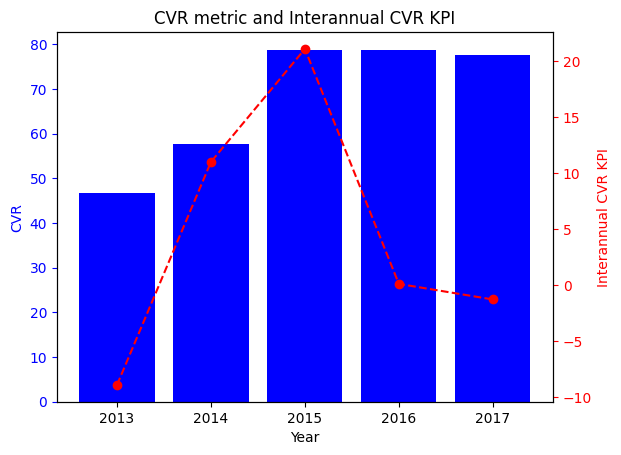

In [73]:
#This code generates a bar chart with the conversion rates per year displayed as blue bars and the year-over-year 
#conversion rate increase shown as a red trend line connecting the tops of the bars. The left y-axis represents 
#the conversion rate, while the right y-axis represents the conversion rate increase. The trend line illustrates the
#overall trend of the increase.

fig, ax1 = plt.subplots()

ax1.bar(result_df['Year'], result_df['CVR'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('CVR', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(result_df['Year'], result_df['Interannual CVR KPI'], color='red', marker='o', linestyle='--')
ax2.set_ylabel('Interannual CVR KPI', color='red')
ax2.tick_params('y', colors='red')

plt.title('CVR metric and Interannual CVR KPI')
plt.show()

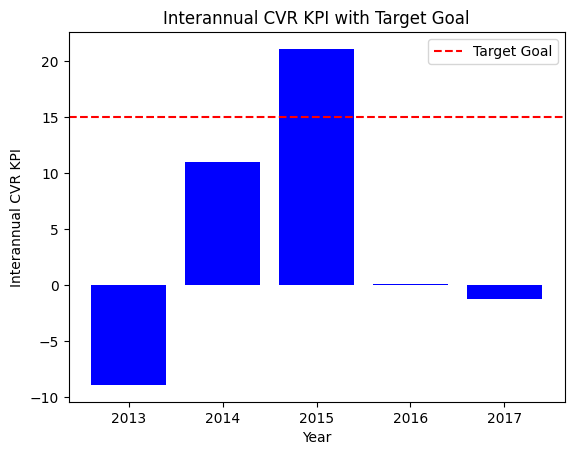

In [77]:
#Additionally, the pie chart has been updated to reflect the target goal based on the Interannual CVR KPI.
#The target goal is calculated by adding 15 to the last available value of the Interannual CVR KPI.

target_goal = 15.0

# Generate the bar chart with the target goal
fig, ax = plt.subplots()

ax.bar(result_df['Year'], result_df['Interannual CVR KPI'], color='blue')
ax.axhline(y=target_goal, color='red', linestyle='--', label='Target Goal')
ax.set_xlabel('Year')
ax.set_ylabel('Interannual CVR KPI')
ax.set_title('Interannual CVR KPI with Target Goal')
ax.legend()

plt.show()


In [157]:
df_MOOC_trends

,MOOC,Year,New Learners,Courses,Microcredentials,Degrees,Revenues,Consumer,Enterprise,Master Degrees
0,Coursera,2021.0,97000000.0,6000.0,910.0,34.0,415400000.0,246200000.0,120400000.0,48800000.0
1,Edx,2021.0,42000000.0,3550.0,480.0,13.0,97500000.0,NaN,NaN,NaN
2,FutureLearn,2021.0,17000000.0,1400.0,180.0,22.0,13200000.0,NaN,NaN,NaN
3,Coursera,2020.0,76000000.0,4600.0,614.0,25.0,293700000.0,193000000.0,70800000.0,29900000.0
4,Edx,2020.0,35000000.0,3100.0,385.0,13.0,84700000.0,NaN,NaN,NaN
5,FutureLearn,2020.0,14000000.0,1160.0,86.0,28.0,10000000.0,NaN,NaN,NaN
6,Coursera,2019.0,45000000.0,3800.0,419.0,16.0,184300000.0,121000000.0,48200000.0,15100000.0
7,Edx,2019.0,24000000.0,2640.0,292.0,10.0,76000000.0,NaN,NaN,NaN
8,FutureLearn,2019.0,11500000.0,880.0,49.0,23.0,9000000.0,NaN,NaN,NaN
9,Coursera,2018.0,37000000.0,3100.0,313.0,11.0,140900000.0,107500000.0,26000000.0,7400000.0


In [158]:
# Dropping rows with NaN values and changing data types
df_MOOC_trends = df_MOOC_trends.drop(df_MOOC_trends.index[-3:])
df_MOOC_trends.reset_index(drop=True, inplace=True)
df_MOOC_trends['Year'] = df_MOOC_trends['Year'].astype(int)
df_MOOC_trends['New Learners'] = df_MOOC_trends['New Learners'].astype(int)
df_MOOC_trends['Courses'] = df_MOOC_trends['Courses'].astype(int)
df_MOOC_trends['Microcredentials'] = df_MOOC_trends['Microcredentials'].astype(int)
df_MOOC_trends['Degrees'] = df_MOOC_trends['Degrees'].astype(int)

df_MOOC_trends

,MOOC,Year,New Learners,Courses,Microcredentials,Degrees,Revenues,Consumer,Enterprise,Master Degrees
0,Coursera,2021,97000000,6000,910,34,415400000.0,246200000.0,120400000.0,48800000.0
1,Edx,2021,42000000,3550,480,13,97500000.0,NaN,NaN,NaN
2,FutureLearn,2021,17000000,1400,180,22,13200000.0,NaN,NaN,NaN
3,Coursera,2020,76000000,4600,614,25,293700000.0,193000000.0,70800000.0,29900000.0
4,Edx,2020,35000000,3100,385,13,84700000.0,NaN,NaN,NaN
5,FutureLearn,2020,14000000,1160,86,28,10000000.0,NaN,NaN,NaN
6,Coursera,2019,45000000,3800,419,16,184300000.0,121000000.0,48200000.0,15100000.0
7,Edx,2019,24000000,2640,292,10,76000000.0,NaN,NaN,NaN
8,FutureLearn,2019,11500000,880,49,23,9000000.0,NaN,NaN,NaN
9,Coursera,2018,37000000,3100,313,11,140900000.0,107500000.0,26000000.0,7400000.0


In [244]:
# Writing cleaned version to be loaded in Power Bi
df_MOOC_trends.to_csv('../Other_Sources/MOOC_Trends_2016-2021_Cleaned.csv')

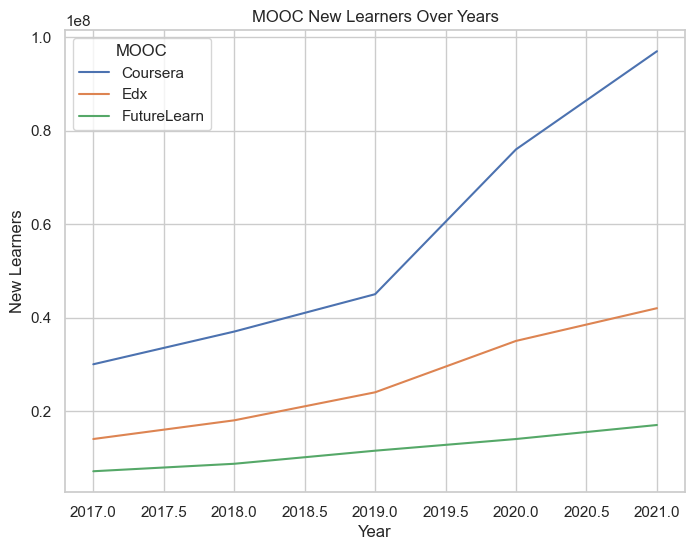

In [159]:
# Using Seaborn to create a line graph with trend lines
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_MOOC_trends, x='Year', y='New Learners', hue='MOOC')

# Setting up title and axis labels
plt.title('MOOC New Learners Over Years')
plt.xlabel('Year')
plt.ylabel('New Learners')

# Displaying the graph
plt.show()

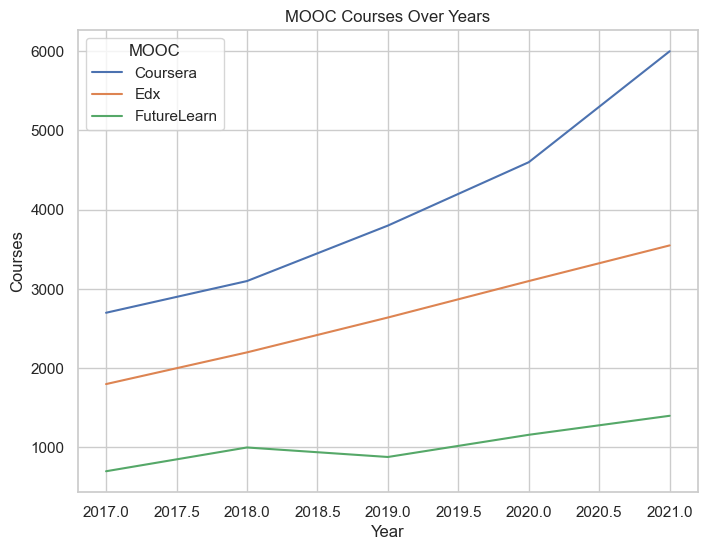

In [160]:
# Using Seaborn to create a line graph with trend lines
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_MOOC_trends, x='Year', y='Courses', hue='MOOC')

# Setting up title and axis labels
plt.title('MOOC Courses Over Years')
plt.xlabel('Year')
plt.ylabel('Courses')

# Displaying the graph
plt.show()

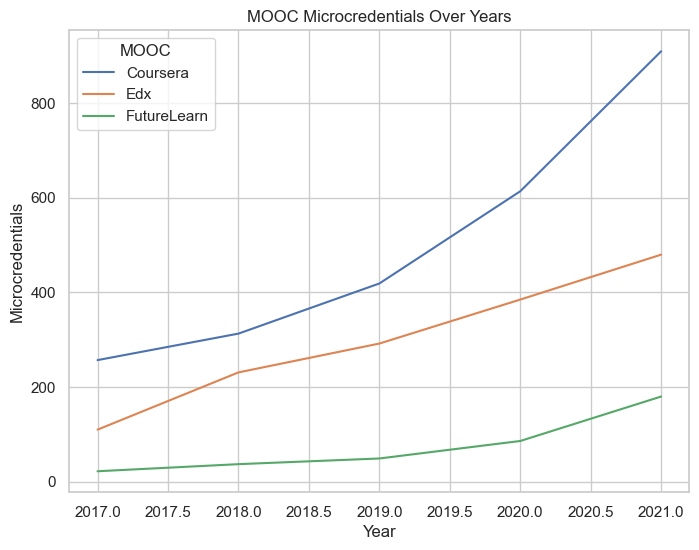

In [161]:
# Using Seaborn to create a line graph with trend lines
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_MOOC_trends, x='Year', y='Microcredentials', hue='MOOC')

# Setting up title and axis labels
plt.title('MOOC Microcredentials Over Years')
plt.xlabel('Year')
plt.ylabel('Microcredentials')

# Displaying the graph
plt.show()

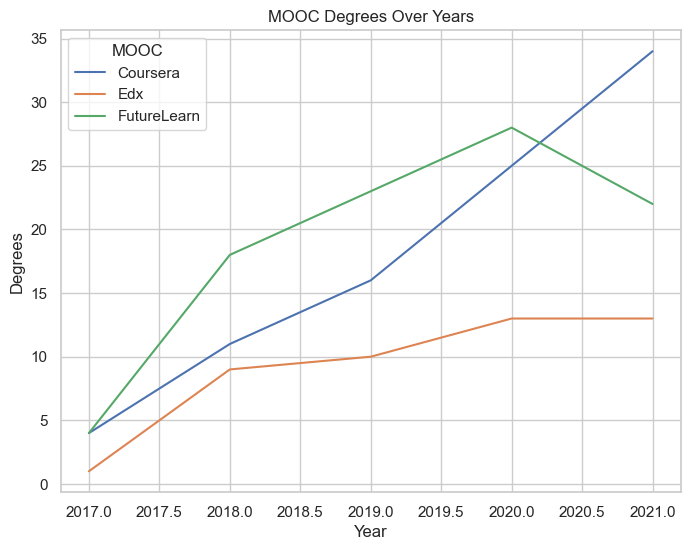

In [162]:
# Using Seaborn to create a line graph with trend lines
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_MOOC_trends, x='Year', y='Degrees', hue='MOOC')

# Setting up title and axis labels
plt.title('MOOC Degrees Over Years')
plt.xlabel('Year')
plt.ylabel('Degrees')

# Displaying the graph
plt.show()

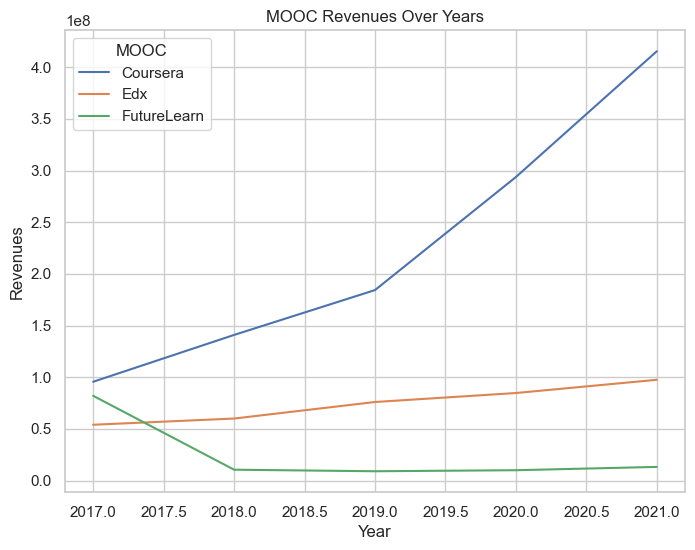

In [163]:
# Using Seaborn to create a line graph with trend lines
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_MOOC_trends, x='Year', y='Revenues', hue='MOOC')

# Setting up title and axis labels
plt.title('MOOC Revenues Over Years')
plt.xlabel('Year')
plt.ylabel('Revenues')

# Displaying the graph
plt.show()

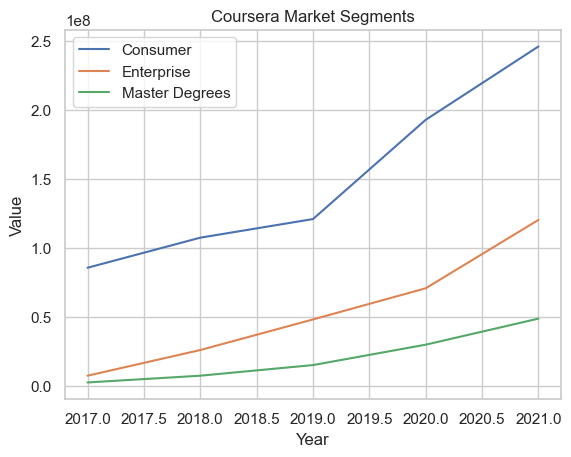

In [165]:

# Filter the DataFrame for Coursera
df_coursera = df_MOOC_trends[df_MOOC_trends['MOOC'] == 'Coursera']

# Get the values for the market segments
consumer = df_coursera['Consumer']
enterprise = df_coursera['Enterprise']
degrees = df_coursera['Master Degrees']

# Get the values for the years
years = df_coursera['Year']

# Create the line plot
plt.plot(years, consumer, label='Consumer')
plt.plot(years, enterprise, label='Enterprise')
plt.plot(years, degrees, label='Master Degrees')

# Configure axis labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Coursera Market Segments')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [127]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder to the MOOC column
encoded_MOOC = encoder.fit_transform(df_MOOC_trends[['MOOC']])

# Create a DataFrame from the encoded MOOC variable
df_encoded_MOOC = pd.DataFrame(encoded_MOOC, columns=encoder.categories_[0])

# Convert the Year column to string and apply OneHotEncoder
df_MOOC_trends['Year'] = df_MOOC_trends['Year'].astype(str)
encoded_Year = encoder.fit_transform(df_MOOC_trends[['Year']])

# Create a DataFrame from the encoded Year variable
df_encoded_Year = pd.DataFrame(encoded_Year, columns=encoder.categories_[0])

# Concatenate the encoded DataFrames with the original DataFrame
df_encoded = pd.concat([df_MOOC_trends, df_encoded_MOOC, df_encoded_Year], axis=1)

# Drop the original MOOC and Year columns
df_encoded.drop(['MOOC', 'Year'], axis=1, inplace=True)

# Show the resulting encoded DataFrame
df_encoded

,Learners,Courses,Microcredentials,Degrees,Coursera,Edx,FutureLearn,2016,2017,2018,2019,2020,2021
0,97000000,6000,910,34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,42000000,3550,480,13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,17000000,1400,180,22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,76000000,4600,614,25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,35000000,3100,385,13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,14000000,1160,86,28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,45000000,3800,419,16,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,24000000,2640,292,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,11500000,880,49,23,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,37000000,3100,313,11,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


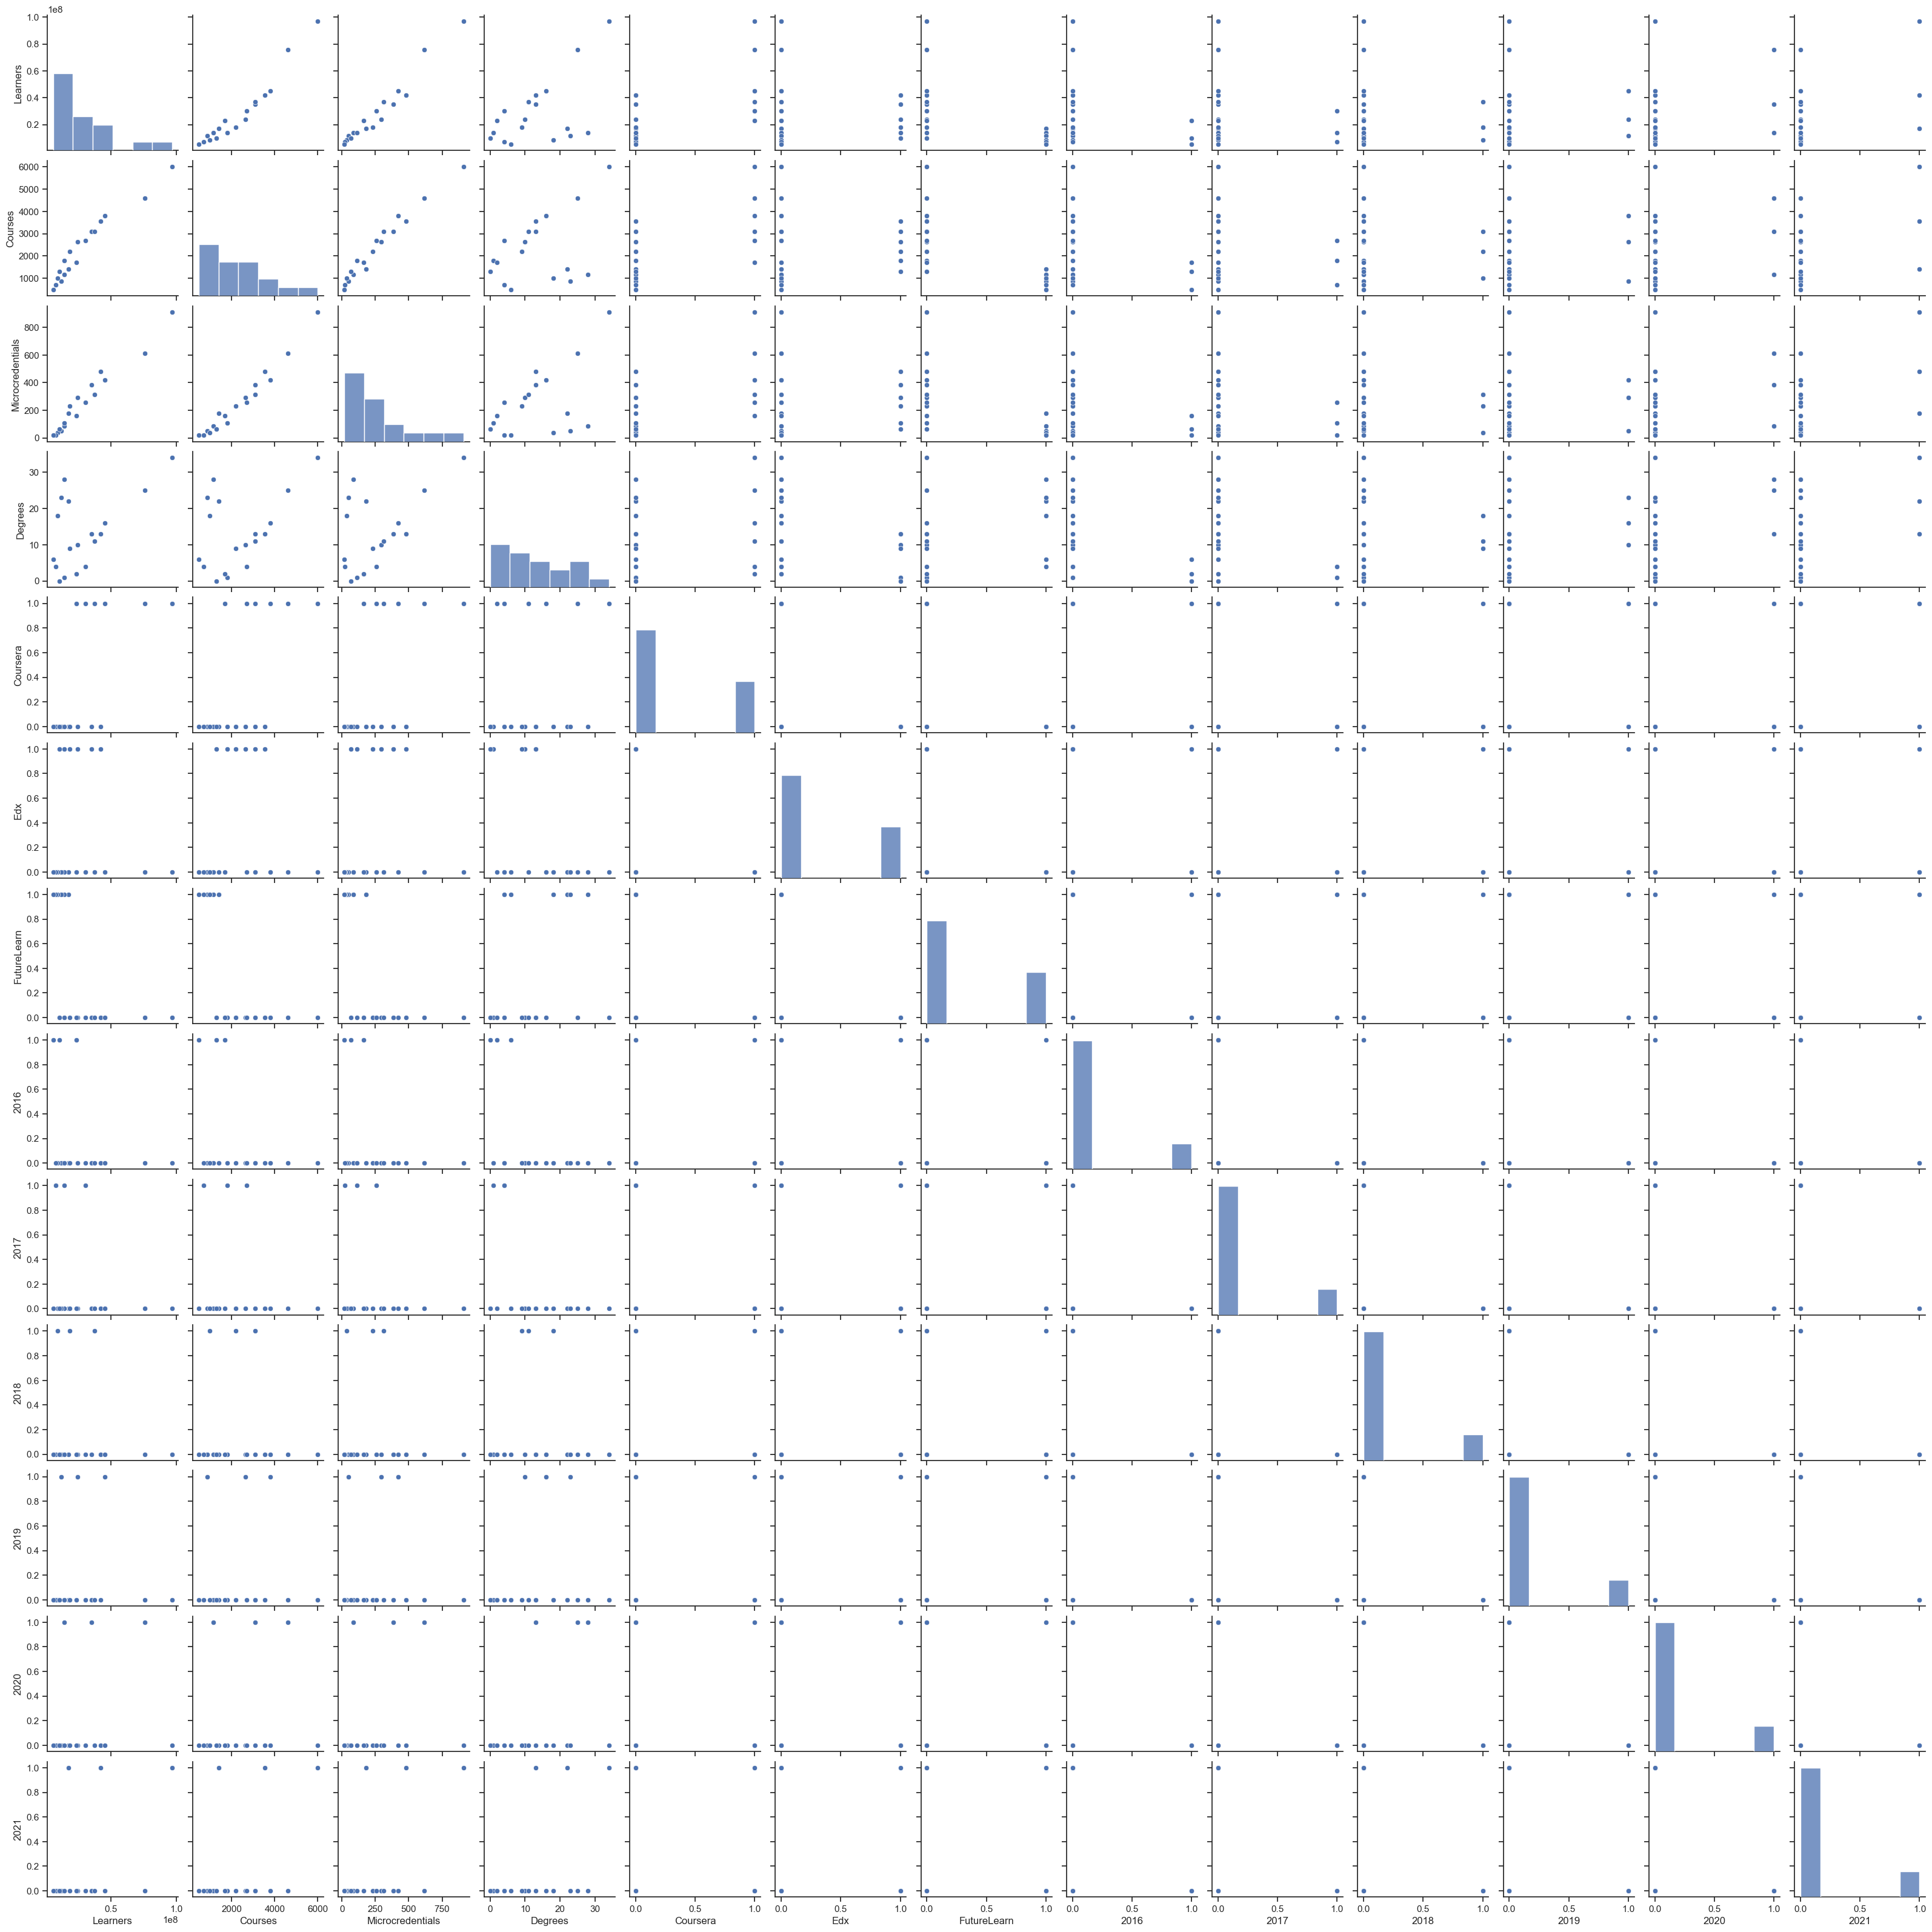

In [128]:
# Use Seaborn to create the pairplot
sns.set(style='ticks')
sns.pairplot(df_encoded)

# Show the plot
plt.show()

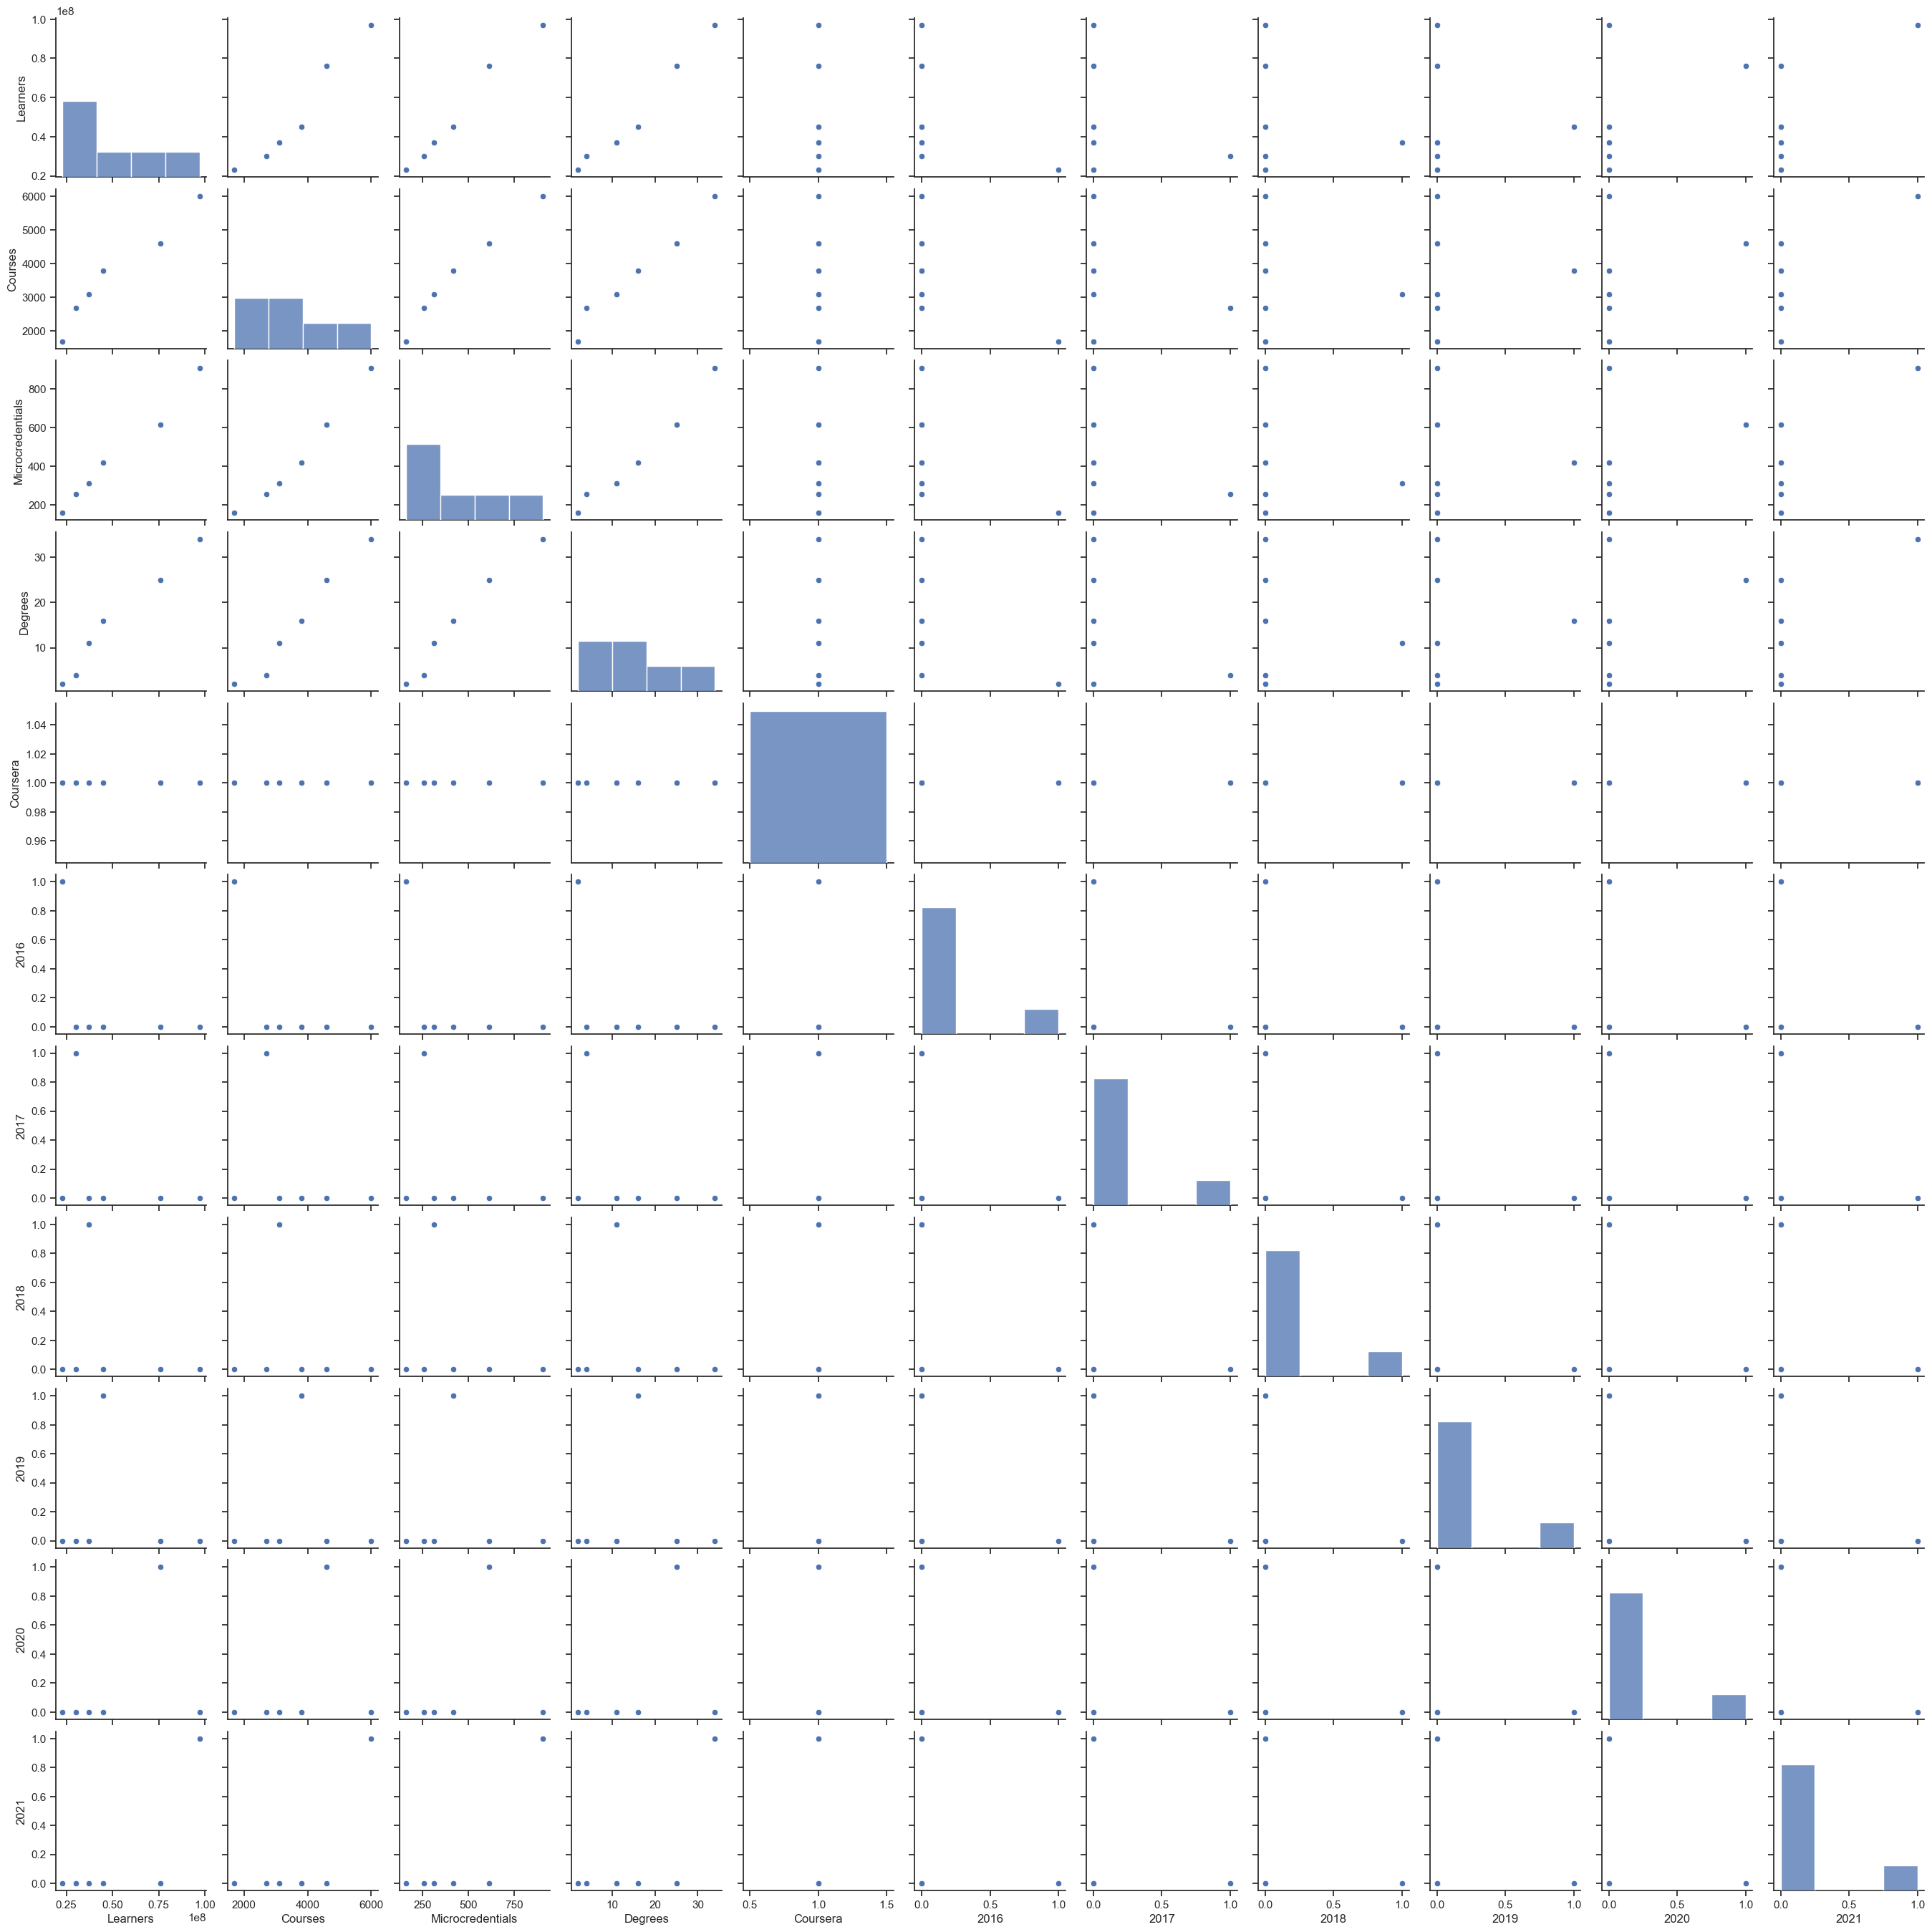

In [131]:
# Filter the DataFrame for Coursera data and omit the Edx and FutureLearn columns
df_coursera_filtered = df_encoded[df_encoded['Coursera'] == 1].drop(['Edx', 'FutureLearn', 'learners'], axis=1)

# Use Seaborn to create the pairplot
sns.set(style='ticks')
sns.pairplot(df_coursera_filtered)

# Show the plot
plt.show()

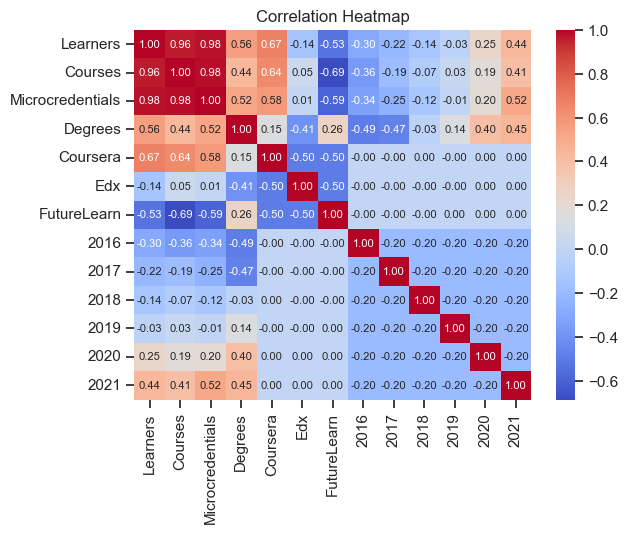

In [133]:
# Create a heatmap using the df_encoded DataFrame
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 8})

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [46]:
#Displaying appbot review
df_edx_appbot

,App,Store,App ID,Review ID,Country,Version,Rating,Date,Author,Subject,...,Translated Subject,Translated Body,Sentiment,Device,Language,OS Version,Reply URL,Topics,Custom Topics,Tags
0,edX: Courses by Harvard & MIT,Google Play,org.edx.mobile,c57c2a7f-af6d-401e-992d-ebe06ba89805,Spanish,NaN,5,2023-06-14,JEISON RODRIGUEZ,NaN,...,NaN,Excellent work congratulations 👏,positive,NaN,Occitan,NaN,https://app.appbot.co/apps/680011-edx-courses-...,"[""Satisfied users""]",[],[]
1,edX: Courses by Harvard & MIT,Google Play,org.edx.mobile,fed6a8d6-f1a5-42d1-87fd-33b32a8b3b3e,Spanish,NaN,5,2023-06-13,Rodrigo Villalobos,NaN,...,NaN,I learned a lot,positive,NaN,Spanish,NaN,https://app.appbot.co/apps/680011-edx-courses-...,[],[],[]
2,edX: Courses by Harvard & MIT,Google Play,org.edx.mobile,023d4999-dd3b-4a72-bd67-311ae06e2982,Spanish,NaN,5,2023-06-10,omar villanueva mendoza,NaN,...,NaN,Very good,positive,NaN,Spanish,NaN,https://app.appbot.co/apps/680011-edx-courses-...,[],[],[]
3,edX: Courses by Harvard & MIT,Google Play,org.edx.mobile,655c93cd-1d7f-4777-9fac-fbb706d06f1f,Spanish,NaN,5,2023-06-08,Luis Ochoteco Asensio,NaN,...,NaN,NaN,positive,NaN,English,NaN,https://app.appbot.co/apps/680011-edx-courses-...,[],[],[]
4,edX: Courses by Harvard & MIT,Google Play,org.edx.mobile,87789822-cff0-489e-8d0a-41551e43e8a6,Spanish,NaN,1,2023-06-07,Juan Garcia,NaN,...,NaN,"CQ😍🌞14 HERE) , azxQw' ' A aqQ Q za The Lkqw K)...",neutral,NaN,Spanish,NaN,https://app.appbot.co/apps/680011-edx-courses-...,[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,edX: Courses by Harvard & MIT,Google Play,org.edx.mobile,gp:AOqpTOGnPdvciL5N18STzmJgWe0l50Cwlp9SwuT1qPK...,Spanish,NaN,5,2019-06-16,Alberto Martínez,NaN,...,NaN,NaN,positive,NaN,Spanish,NaN,https://app.appbot.co/apps/680011-edx-courses-...,[],[],[]
2837,edX: Courses by Harvard & MIT,Google Play,org.edx.mobile,gp:AOqpTOHPj8WybxLRx99biCRK7QsFnuezGoZyFqFg7QJ...,Spanish,NaN,5,2019-06-16,Hector Ruiz,NaN,...,NaN,NaN,positive,NaN,Spanish,NaN,https://app.appbot.co/apps/680011-edx-courses-...,"[""Satisfied users""]",[],[]
2838,edX: Courses by Harvard & MIT,Google Play,org.edx.mobile,gp:AOqpTOGzUV3bl5foVrt-GtH20norNvi-qvbv_n4DXTq...,Spanish,NaN,4,2019-06-15,Fredy Gabriel Ramírez Villanueva,NaN,...,NaN,NaN,positive,NaN,Spanish,NaN,https://app.appbot.co/apps/680011-edx-courses-...,[],[],[]
2839,edX: Courses by Harvard & MIT,Google Play,org.edx.mobile,gp:AOqpTOEml1NUvV1i1qs3zXDwpRQb8FW7EyCVfeXWZyP...,Spanish,NaN,5,2019-06-15,Juan Alvarado,NaN,...,NaN,NaN,positive,NaN,Spanish,NaN,https://app.appbot.co/apps/680011-edx-courses-...,[],[],[]


In [47]:
df_coursera_appbot

,App,Store,App ID,Review ID,Country,Version,Rating,Date,Author,Subject,...,Translated Subject,Translated Body,Sentiment,Device,Language,OS Version,Reply URL,Topics,Custom Topics,Tags
0,Coursera: Learn career skills,Google Play,org.coursera.android,c19411cb-d408-4204-898e-64d4846a65fc,Spanish,NaN,5,2023-06-14,Dairin Rodriguez,NaN,...,NaN,Excellent!!,positive,NaN,English,NaN,https://app.appbot.co/apps/485593-coursera-lea...,"[""Satisfied users""]",[],[]
1,Coursera: Learn career skills,Google Play,org.coursera.android,cdbfebc0-8e01-4a59-8e2c-03870b51109f,Spanish,NaN,5,2023-06-14,Hernan Cieza,NaN,...,NaN,NaN,positive,NaN,Dutch,NaN,https://app.appbot.co/apps/485593-coursera-lea...,[],[],[]
2,Coursera: Learn career skills,Google Play,org.coursera.android,cd78d0c6-790a-4ed6-aaef-8de4e6a46e26,Spanish,NaN,5,2023-06-14,Antonio Elías,NaN,...,NaN,NaN,positive,NaN,Spanish,NaN,https://app.appbot.co/apps/485593-coursera-lea...,[],[],[]
3,Coursera: Learn career skills,Google Play,org.coursera.android,236bb4d8-f527-4aa0-a31e-1386733d2052,Spanish,NaN,5,2023-06-14,Rosmira Alfaro Ballesta,NaN,...,NaN,NaN,positive,NaN,Slovak,NaN,https://app.appbot.co/apps/485593-coursera-lea...,"[""Satisfied users""]",[],[]
4,Coursera: Learn career skills,Google Play,org.coursera.android,d52c6168-fba0-447a-ac19-85f4b7fad52f,Spanish,NaN,5,2023-06-13,Nury Sanchez,NaN,...,NaN,"I like it a lot, they offer me the opportunity...",positive,NaN,Spanish,NaN,https://app.appbot.co/apps/485593-coursera-lea...,"[""Satisfied users""]",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,Coursera: Learn career skills,Google Play,org.coursera.android,gp:AOqpTOG9YrUp5qjjX8I8bcaEn3brYGzQxKzTQl9oUaU...,Spanish,NaN,5,2019-06-19,L.P. Lau Cnt,NaN,...,NaN,super good courses,positive,NaN,Spanish,NaN,https://app.appbot.co/apps/485593-coursera-lea...,"[""Satisfied users""]",[],[]
1695,Coursera: Learn career skills,Google Play,org.coursera.android,gp:AOqpTOFqMO6stOE30EP6OCkroNWbAZ6ZQRkdR5nhkCs...,Spanish,NaN,4,2019-06-19,Griselda González Castillo,NaN,...,NaN,Excellent,positive,NaN,Spanish,NaN,https://app.appbot.co/apps/485593-coursera-lea...,"[""Satisfied users""]",[],[]
1696,Coursera: Learn career skills,Google Play,org.coursera.android,gp:AOqpTOG3oHse37PoRqkvkOB-VIhowhbsbiOk4I6zwah...,Spanish,NaN,5,2019-06-17,Aufra Phi,NaN,...,NaN,excellent application.,positive,NaN,Spanish,NaN,https://app.appbot.co/apps/485593-coursera-lea...,"[""Satisfied users""]",[],[]
1697,Coursera: Learn career skills,Google Play,org.coursera.android,gp:AOqpTOGZcDph63IkpZsIJJ2-mUVeGKg8uTxA6anttn4...,Spanish,NaN,5,2019-06-16,Gabriel Loosli,NaN,...,NaN,"Very good app, great variety of courses 👌🏼",positive,NaN,Spanish,NaN,https://app.appbot.co/apps/485593-coursera-lea...,[],[],[]


In [184]:
#Checking for wrong values in Translated Body column

#Init list for rows with wrong values
invalid_rows = []

#Scan the column looking for non str values
for index, row in df_coursera_appbot.iterrows():
    if not isinstance(row['Translated Body'], str):
        invalid_rows.append((index, type(row['Translated Body']), row['Translated Body']))

#Displaying the rows with the wrong data type and value
for row in invalid_rows:
    print(f"Index: {row[0]}, Type: {row[1]}, Value: {row[2]}")

#Replace NaN values found by an empty str
df_coursera_appbot['Translated Body'].fillna('', inplace=True)

In [185]:
#Checking for wrong values in Sentiment column

#Init list for rows with wrong values
invalid_rows = []

#Scan the column looking for non str values
for index, row in df_coursera_appbot.iterrows():
    if not isinstance(row['Sentiment'], str):
        invalid_rows.append((index, type(row['Sentiment']), row['Sentiment']))

#Displaying the rows with wrong data type and value
for row in invalid_rows:
    print(f"Index: {row[0]}, Type: {row[1]}, Value: {row[2]}")

#Replace wrong values found by an empty str
#df_coursera_appbot['Sentiment'].fillna('', inplace=True)

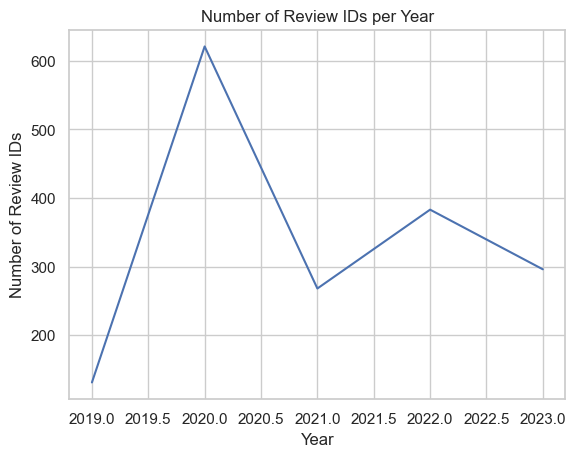

In [167]:
# Convert 'Date' to date format
df_coursera_appbot['Date'] = pd.to_datetime(df_coursera_appbot['Date'])

# Add a 'Year' column
df_coursera_appbot['Year'] = df_coursera_appbot['Date'].dt.year

# Counting Review IDs by year
review_counts = df_coursera_appbot['Review ID'].groupby(df_coursera_appbot['Year']).count()

# Create a line graph
plt.plot(review_counts.index, review_counts.values)

# Setting graph title and labels
plt.title('Number of Review IDs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Review IDs')

# Displaying the graph
plt.show()


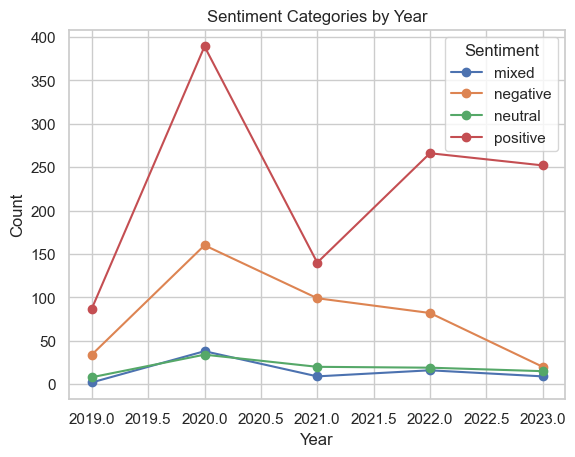

In [168]:
# Counting the Sentiment categories by year
sentiment_counts = df_coursera_appbot.groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)

# Create a line graph
sentiment_counts.plot(kind='line', marker='o')

# Setting the graph title and labels
plt.title('Sentiment Categories by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Displaying the graph
plt.show()



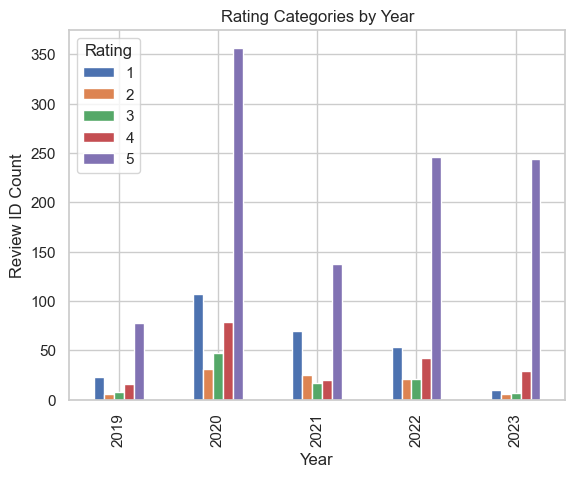

In [172]:
# Counting Review IDs with Rating categories by year
rating_counts = df_coursera_appbot.groupby(['Year', 'Rating']).size().unstack(fill_value=0)

# Create the bar graph
rating_counts.plot(kind='bar')

# Setting the graph title and labels
plt.title('Rating Categories by Year')
plt.xlabel('Year')
plt.ylabel('Review ID Count')

# Displaying the graph
plt.show()


Text(0, 0.5, 'Count')

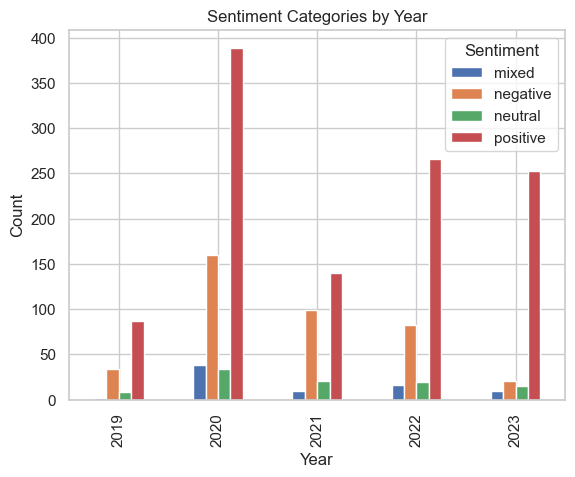

In [177]:
# Count the different Sentiment categories per year
sentiment_counts = df_coursera_appbot.groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)

# Create the bar chart
sentiment_counts.plot(kind='bar')

# Set the titles and labels for the chart
plt.title('Sentiment Categories by Year')
plt.xlabel('Year')
plt.ylabel('Count')


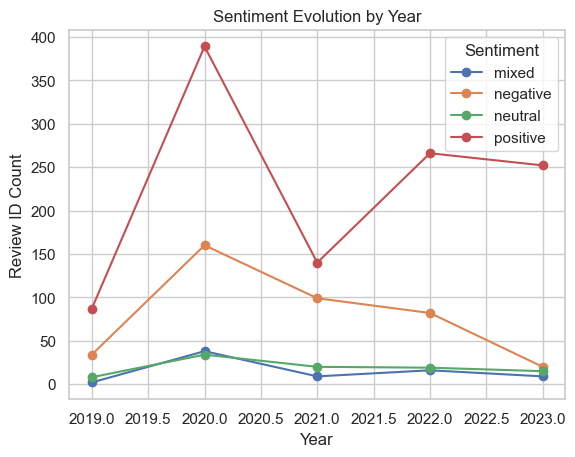

In [173]:
# Conunting the Review IDs with each Sentiment category by year
sentiment_counts = df_coursera_appbot.groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)

# Crear el gráfico de líneas múltiples
sentiment_counts.plot(kind='line', marker='o', linestyle='-')

# Establecer los títulos y etiquetas del gráfico
plt.title('Sentiment Evolution by Year')
plt.xlabel('Year')
plt.ylabel('Review ID Count')

# Mostrar el gráfico
plt.show()

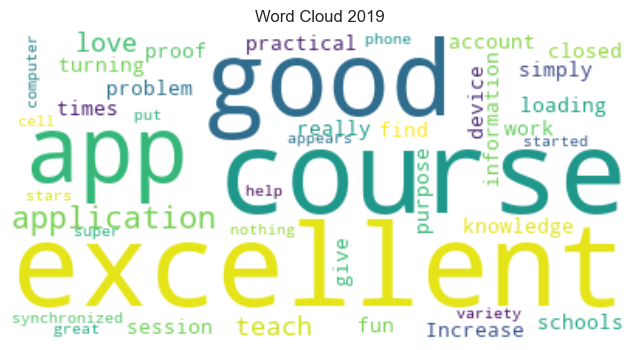

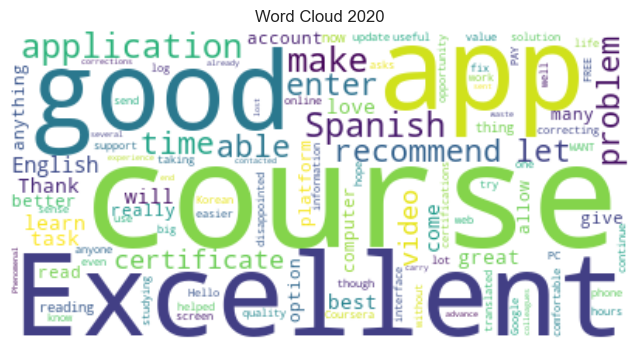

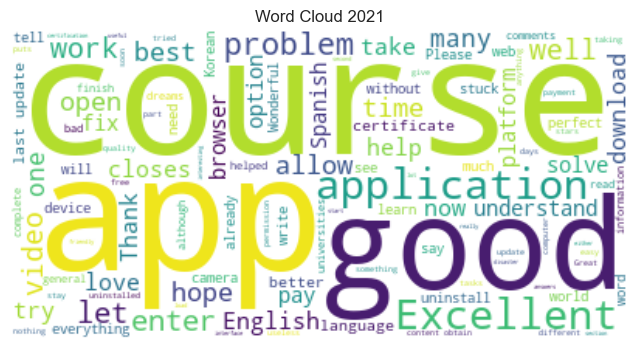

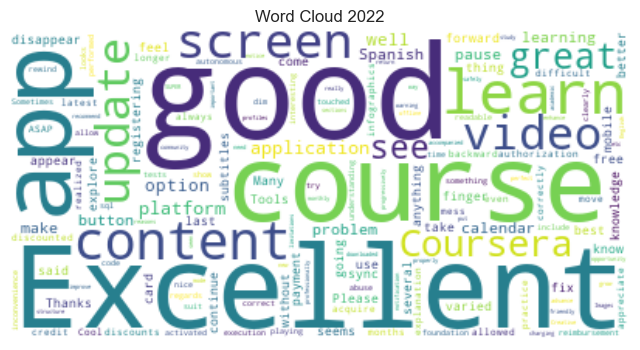

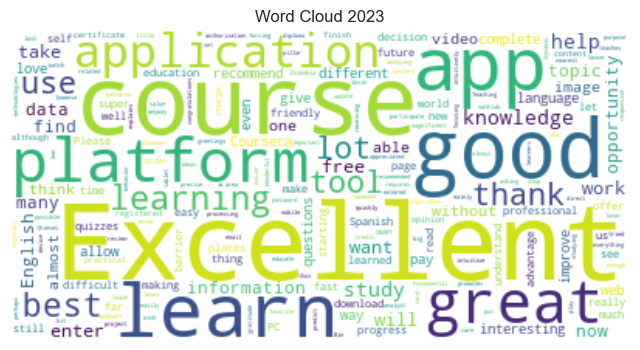

In [189]:
# WordCloud

#  Grouping the data by year
grouped_by_year = df_coursera_appbot.groupby('Year')

# Iterating in the groups and generating the wordcloud by year
for year, group in grouped_by_year:
    # Joining the reviews texts per each year
    text = ' '.join(group['Translated Body'])
    
    # Creating the WordCloud object
    wordcloud = WordCloud(background_color='white').generate(text)
    
    # Displaying the Word Cloud
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud {year}')
    plt.axis('off')
    plt.show()


In [199]:

stop_words = set(stopwords.words("english"))  # Ajusta el idioma según tus datos

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

df_coursera_appbot["processed_text"] = df_coursera_appbot["Translated Body"].apply(preprocess_text)

all_words = [word for sublist in df_coursera_appbot["processed_text"] for word in sublist]

word_counts = Counter(all_words)

top_words = word_counts.most_common(10)


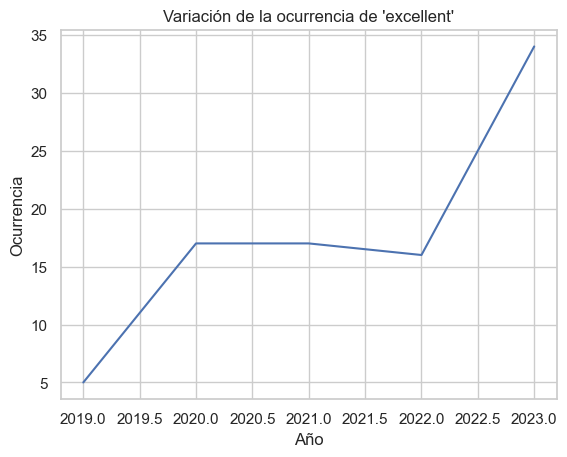

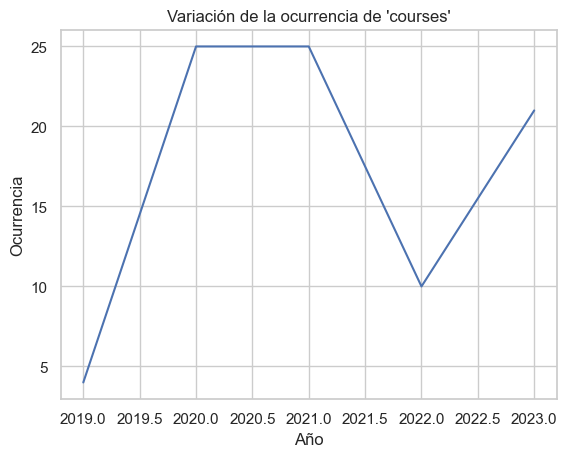

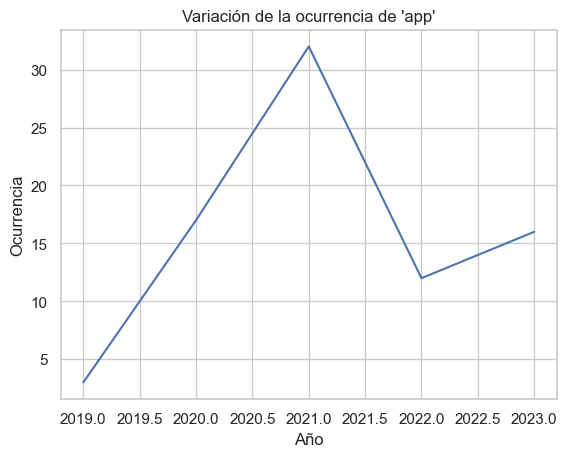

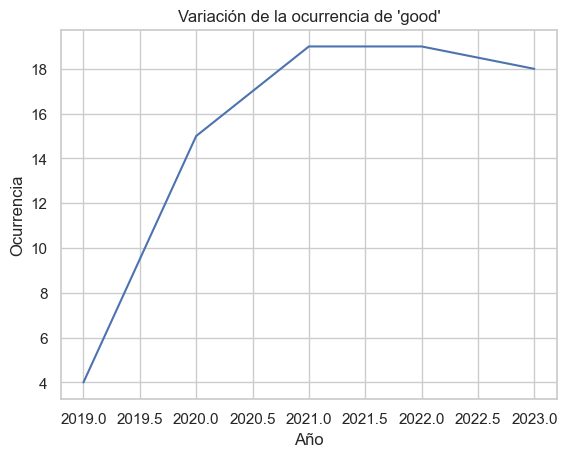

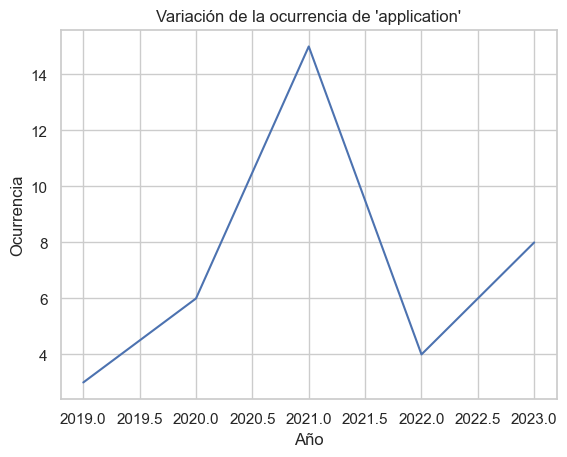

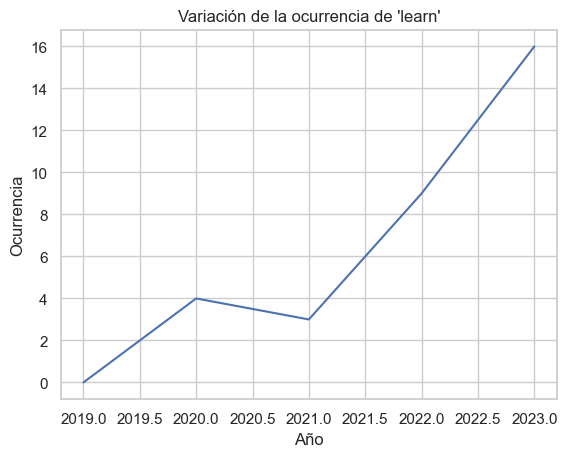

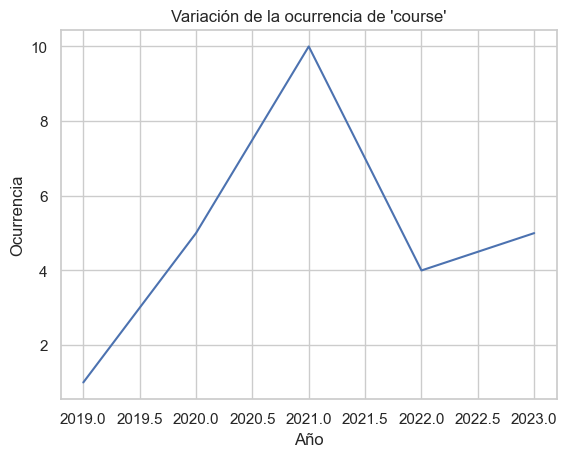

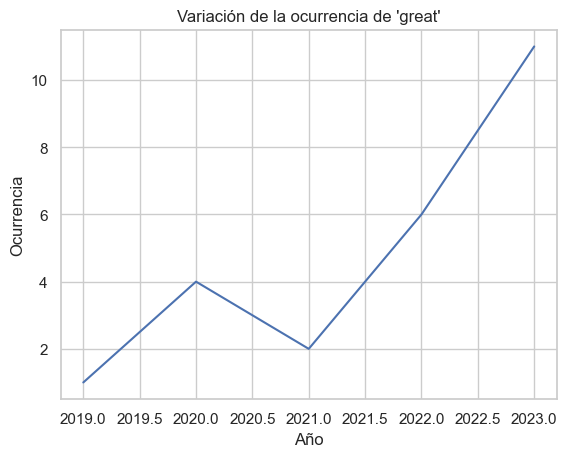

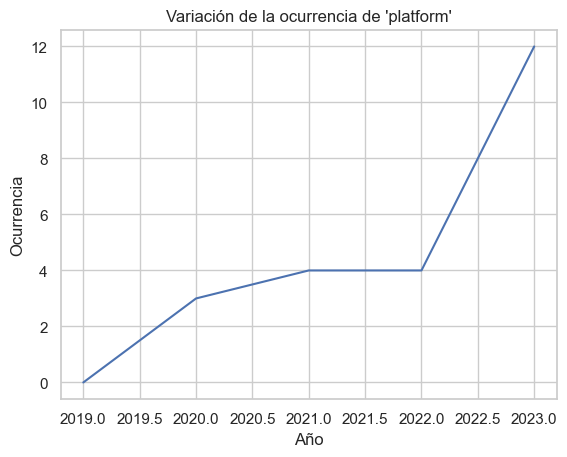

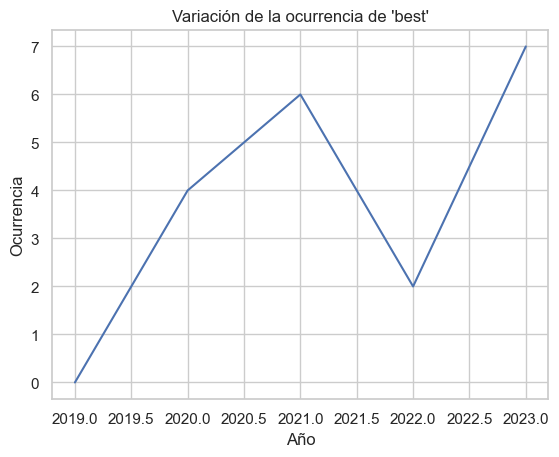

In [200]:
#Adjusting the Year column
years = df_coursera_appbot["Year"].unique() 

#Counting words per year
for word, _ in top_words:
    word_counts_yearly = []

    for year in years:
        word_counts_yearly.append(sum(df_coursera_appbot[df_coursera_appbot["Year"] == year]["processed_text"].apply(lambda x: x.count(word))))

    
#Displaying the graph per each top word    
    plt.figure()
    plt.plot(years, word_counts_yearly)
    plt.title(f"Frequency variation of '{word}'")
    plt.xlabel("Year")
    plt.ylabel("Frequency")
    plt.show()

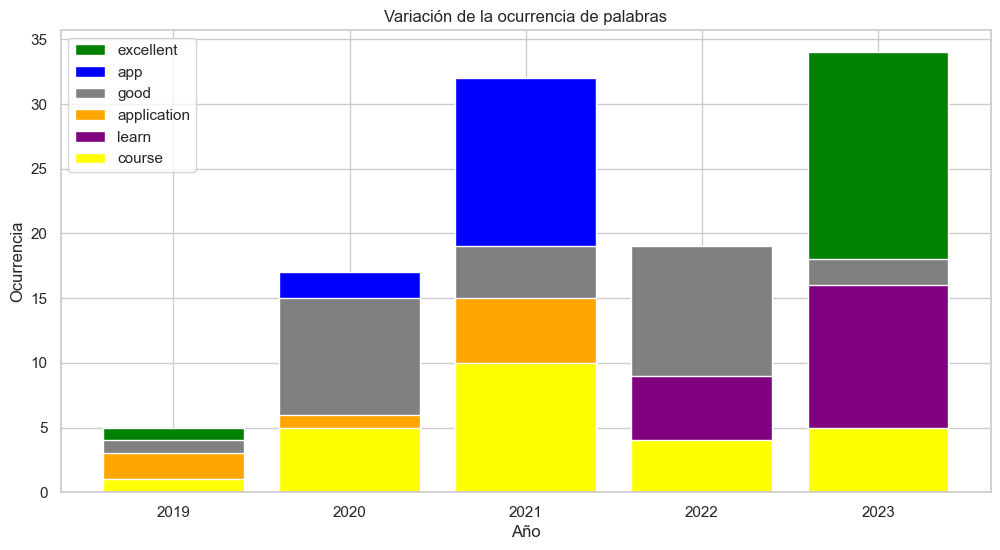

In [212]:
# Formatting the Year column
df_coursera_appbot['Year'] = pd.to_datetime(df_coursera_appbot['Year'], format='%Y').dt.year

# Getting unique years
years = df_coursera_appbot['Year'].unique()

# Create a list to store the top words without plural words
filtered_top_words = []

# Filtering the top words dropping plural words and picking the top five
for word, freq in top_words:
    if not word.endswith('s') and len(filtered_top_words) < 6:
        filtered_top_words.append((word, freq))

# Create a list to store the colours linked to each top word
colors = ['green', 'blue', 'grey', 'orange', 'purple','yellow']

# Creating the bar graph
plt.figure(figsize=(12, 6))

for i, (word, _) in enumerate(filtered_top_words):
    word_counts_yearly = []

    for year in years:
        word_counts_yearly.append(sum(df_coursera_appbot[df_coursera_appbot['Year'] == year]['processed_text'].apply(lambda x: x.count(word))))

    plt.bar(years, word_counts_yearly, color=colors[i], label=word)

plt.xlabel('Año')
plt.ylabel('Ocurrencia')
plt.title('Variación de la ocurrencia de palabras')
plt.legend()
plt.show()
